In [142]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [143]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

##HAY ALGUNA FORMA DE IMPORTAR LOS DATOS LIMPIOS?? EXPORTR CSV??

In [144]:
sharks = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/attacks.csv', encoding="ISO-8859-1")

In [145]:
sdf = pd.DataFrame(sharks)

In [146]:
sdf.drop(columns=['Case Number.1', 'Case Number.2', 'pdf', 'href formula', 'href', 'Unnamed: 22', 'Unnamed: 23', 'Name', 'Investigator or Source', 'Sex ', 'Age', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Activity', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'original order'], inplace=True)

In [147]:
sdf.dropna(inplace=True)

In [148]:
def filtracion(x):
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    m = re.findall('\d{4}.\d{2}.\d{2}', x)
    if m and m[0][5:7] != '00':
        for k, v in months.items():
            if k == m[0][5:7]:
                return v

In [149]:
sdf['Months'] = sdf['Case Number'].apply(filtracion)

In [150]:
sdf.dropna(inplace=True)

In [151]:
sdf.head()

,Case Number,Type,Months
0,2018.06.25,Boating,Jun
1,2018.06.18,Unprovoked,Jun
2,2018.06.09,Invalid,Jun
3,2018.06.08,Unprovoked,Jun
4,2018.06.04,Provoked,Jun


##PODEMOS OBSRVAR QUE LA MAYORIA DE LOS ATAQUES PERTENCECN A LA CATEGORIA 'UNPROVOKED'

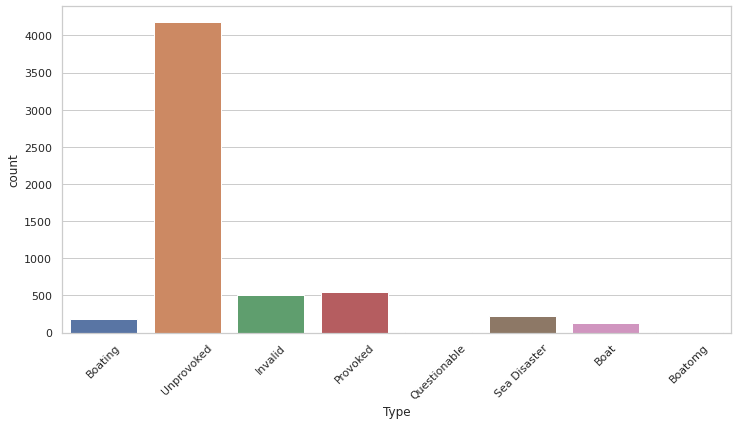

In [152]:
g = sns.countplot(x=sdf['Type'])
g.tick_params(axis='x', rotation=45);

In [153]:
ataques_mensuales = pd.DataFrame(sdf['Months'].value_counts()).reset_index()

In [154]:
c = {'Months': 'Monthly Attacks', 'index':'Month'}
ataques_mensuales = ataques_mensuales.rename(columns=c)

In [155]:
ataques_mensuales.describe()

,Monthly Attacks
count,12.000000
mean,480.583333
std,89.497037
min,382.000000
25%,408.250000
50%,450.000000
75%,528.000000
max,668.000000


In [156]:
at = ataques_mensuales.reindex([3, 11, 8, 5, 10, 4, 0, 1, 2, 7, 9, 6])

<AxesSubplot:xlabel='Monthly Attacks', ylabel='Count'>

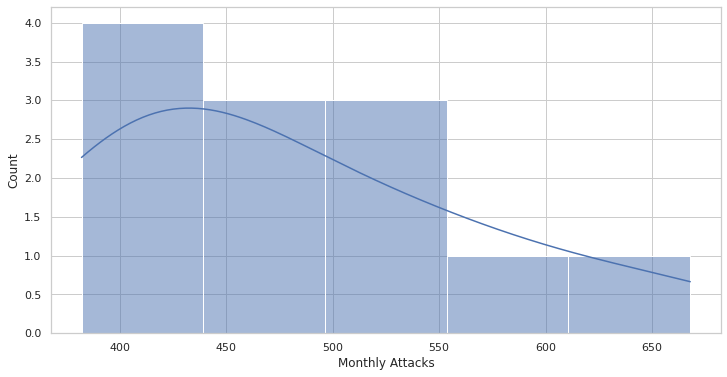

In [157]:
sns.histplot(x=ataques_mensuales['Monthly Attacks'], kde=True)

<AxesSubplot:xlabel='Month', ylabel='Monthly Attacks'>

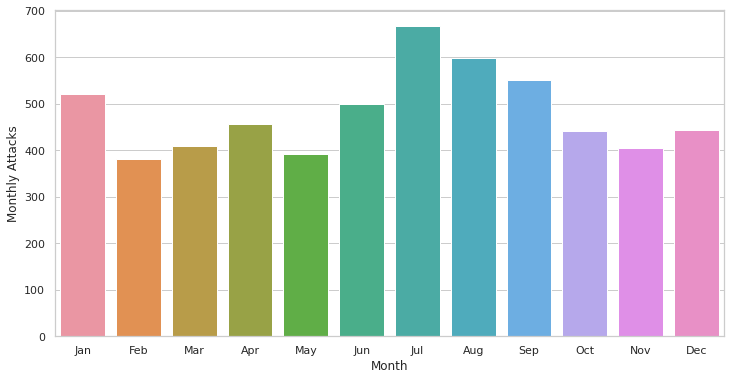

In [158]:
sns.barplot(x='Month', y='Monthly Attacks', data=at)

<AxesSubplot:xlabel='Monthly Attacks'>

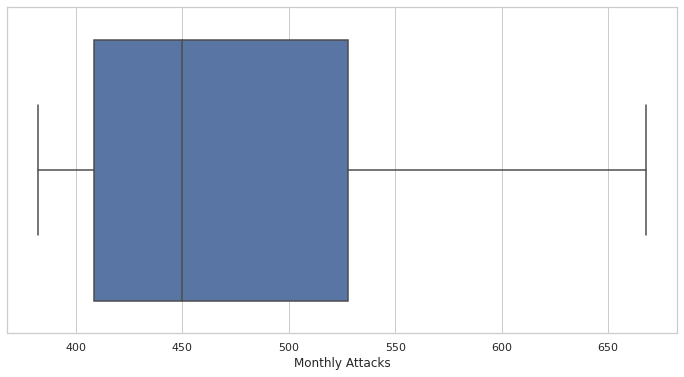

In [159]:
sns.boxplot(x='Monthly Attacks', data=at)

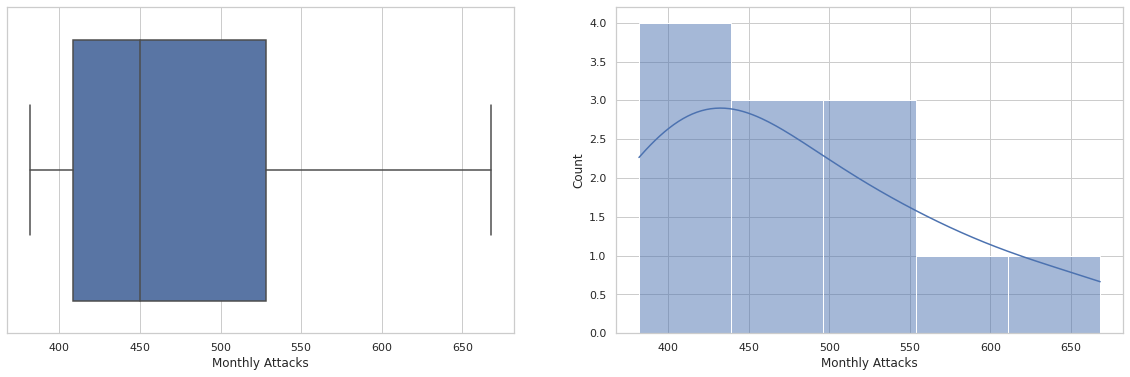

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.boxplot(x='Monthly Attacks', data=at, ax = ax[0])
sns.histplot(x=ataques_mensuales['Monthly Attacks'], kde=True, ax = ax[1]);


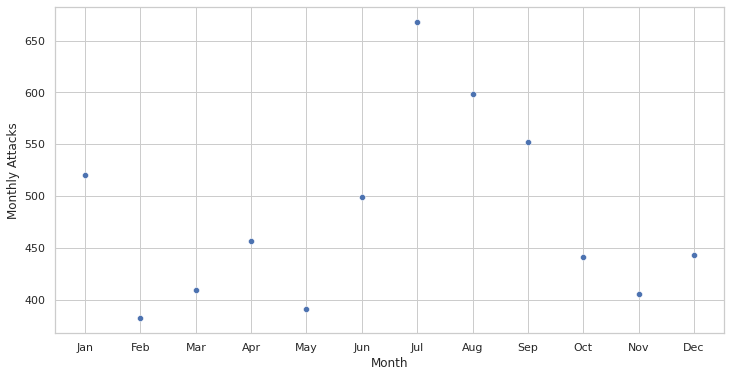

In [161]:
sns.scatterplot(x='Month', y='Monthly Attacks', data=at);